In [374]:
import cv2
import numpy as np

img1 = cv2.imread('original.jpg')


In [375]:
import numpy
data = numpy.loadtxt("temps.txt")


In [376]:

from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
plt.imsave("converted.jpg", data)
img2 = cv2.imread('converted.jpg')

In [377]:
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat

In [378]:


height2 = img2.shape[0]
width2 = img2.shape[1]

height0 = img1.shape[0]

width0 = img1.shape[1]
img1 = rotate_image(img1, 270)
cv2.imwrite("rotated.jpg", img1) 

#resized = cv2.resize(img1, ( height2, int(width0 / height0 * height2)), interpolation = cv2.INTER_AREA)
resized = cv2.resize(img1, ( int(height0 / width0 * width2), width2), interpolation = cv2.INTER_AREA)
cv2.imwrite("resized1.jpg", resized) 

height1 = resized.shape[0]

width1 = resized.shape[1]


#resized = cv2.resize(crop_img, (width2, height2), interpolation = cv2.INTER_AREA)
#cv2.imwrite("resized1.jpg", resized) 

In [379]:
y =  int(height1 / 2 - height2/ 2 - 15)
x =  0
crop_img = resized[y:y + height2, x:x + width2]
cv2.imwrite("cropped.jpg", crop_img) 

True

In [389]:
from skimage import color

grey1 = color.rgb2gray(crop_img)
grey2 = color.rgb2gray(img2)

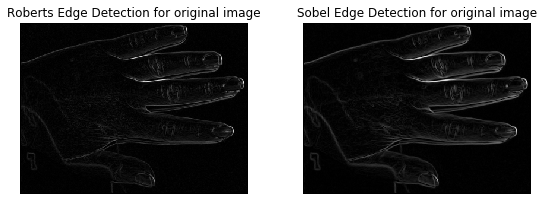

In [391]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h



image = camera()
edge_roberts1 = roberts(grey1)
edge_sobel1 = sobel(grey1)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection for original image')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection for original image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

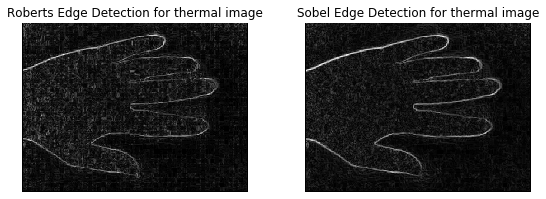

In [392]:

image = camera()
edge_roberts2 = roberts(grey2)
edge_sobel2 = sobel(grey2)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection for thermal image')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection for thermal image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

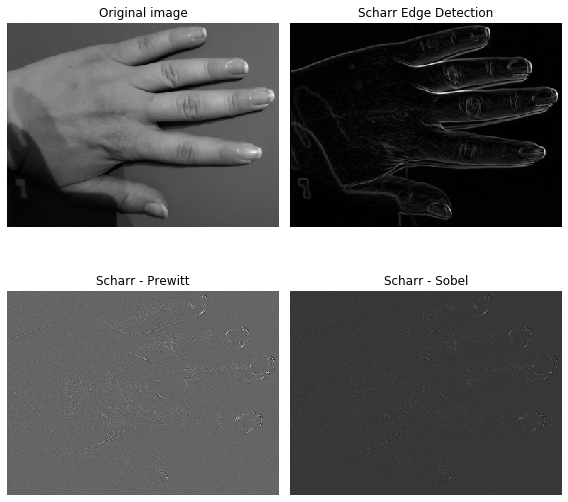

In [394]:

edge_sobel1 = sobel(grey1)
edge_scharr1 = scharr(grey1)
edge_prewitt1 = prewitt(grey1)

diff_scharr_prewitt1 = edge_scharr1 - edge_prewitt1
diff_scharr_sobel1 = edge_scharr1 - edge_sobel1
max_diff = np.max(np.maximum(diff_scharr_prewitt1, diff_scharr_sobel1))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(grey1, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_scharr1, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection')

ax[2].imshow(diff_scharr_prewitt1, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt')

ax[3].imshow(diff_scharr_sobel1, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

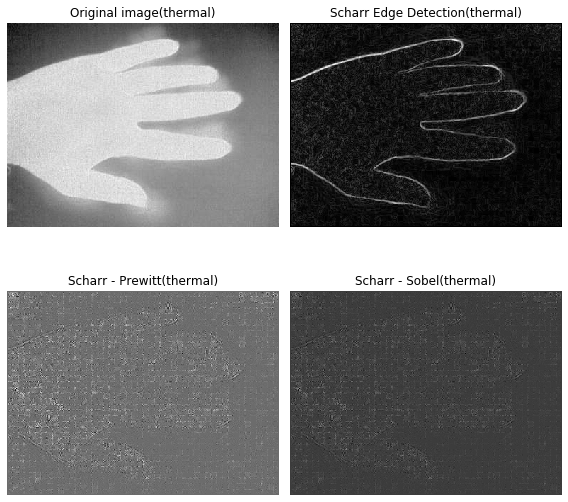

In [396]:
edge_sobel2 = sobel(grey2)
edge_scharr2 = scharr(grey2)
edge_prewitt2 = prewitt(grey2)

diff_scharr_prewitt2 = edge_scharr2 - edge_prewitt2
diff_scharr_sobel2 = edge_scharr2 - edge_sobel2
max_diff = np.max(np.maximum(diff_scharr_prewitt2, diff_scharr_sobel2))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(grey2, cmap=plt.cm.gray)
ax[0].set_title('Original image(thermal)')

ax[1].imshow(edge_scharr2, cmap=plt.cm.gray)
ax[1].set_title('Scharr Edge Detection(thermal)')

ax[2].imshow(diff_scharr_prewitt2, cmap=plt.cm.gray, vmax=max_diff)
ax[2].set_title('Scharr - Prewitt(thermal)')

ax[3].imshow(diff_scharr_sobel2, cmap=plt.cm.gray, vmax=max_diff)
ax[3].set_title('Scharr - Sobel(thermal)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)


true_angle = angle(imgx, imgy)

angle_farid = angle(farid_h(img), farid_v(img))
angle_sobel = angle(sobel_h(img), sobel_v(img))
angle_scharr = angle(scharr_h(img), scharr_v(img))
angle_prewitt = angle(prewitt_h(img), prewitt_v(img))


def diff_angle(angle_1, angle_2):
    return np.minimum(np.pi - np.abs(angle_1 - angle_2),
                      np.abs(angle_1 - angle_2))


diff_farid = diff_angle(true_angle, angle_farid)
diff_sobel = diff_angle(true_angle, angle_sobel)
diff_scharr = diff_angle(true_angle, angle_scharr)
diff_prewitt = diff_angle(true_angle, angle_prewitt)

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(true_angle, cmap=plt.cm.hsv)
ax[1].set_title('Analytical gradient angle')

ax[2].imshow(diff_sobel, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
ax[2].set_title('Sobel error')

ax[3].imshow(diff_prewitt, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
ax[3].set_title('Prewitt error')

ax[4].imshow(diff_scharr, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
ax[4].set_title('Scharr error')

cax = ax[5].imshow(diff_farid, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
ax[5].set_title('Farid error')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.90, 0.10, 0.02, 0.50])
fig.colorbar(cax, cax=cbar_ax, ticks=[0, 0.01, 0.02])

for a in ax:
    a.axis('off')

plt.show()